# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
lending_data_df = pd.read_csv('Resources/lending_data.csv')
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I predict that the logistic regression will display a better model as not anyone will be given a loan and there's always a set range for how much a bank can loan. With this assumption, I doubt there will be any outliers.

## Split the Data into Training and Testing Sets

In [5]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [6]:
# Split the data into X_train, X_test, y_train, y_test
y = lending_data_df[['loan_status']]
X = lending_data_df[['loan_size', 'interest_rate', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [10]:
# Train a Logistic Regression model and print the model score
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [11]:
#Logistic Regression model score
print(f"Training Score: : {model.score(X_train, y_train)}")
print(f"Test Score: : {model.score(X_test, y_test)}")

Training Score: : 0.9920724996560737
Test Score: : 0.9924680148576145


In [12]:
#creating a confusion matric
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18653,    92],
       [   54,   585]], dtype=int64)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9924680148576145


In [14]:
#classifcation report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18745
           1       0.86      0.92      0.89       639

    accuracy                           0.99     19384
   macro avg       0.93      0.96      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [15]:
# Train a Random Forest Classifier model and print the model score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train.values.ravel())

In [18]:
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.68281143e-01 3.11504547e-01 1.88884656e-01 1.08351995e-01
 1.11781830e-04 2.22865877e-01]


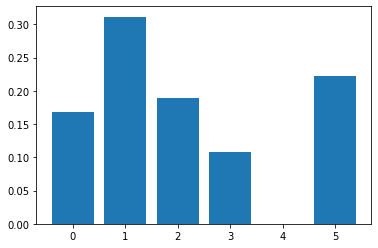

In [22]:
#create barchart to visualize
import matplotlib.pyplot as plt
features = rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [24]:
sel = SelectFromModel(rfc)
sel.fit(X_train_scaled, y_train.values.ravel())
sel.get_support()
sel.transform(X)

C:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[1.07000000e+04, 7.67200000e+00, 4.31818182e-01, 2.28000000e+04],
       [8.40000000e+03, 6.69200000e+00, 3.11926606e-01, 1.36000000e+04],
       [9.00000000e+03, 6.96300000e+00, 3.49240781e-01, 1.61000000e+04],
       ...,
       [1.76000000e+04, 1.05950000e+01, 6.26400996e-01, 5.03000000e+04],
       [1.63000000e+04, 1.00680000e+01, 6.01593625e-01, 4.53000000e+04],
       [1.56000000e+04, 9.74200000e+00, 5.85062241e-01, 4.23000000e+04]])

In [25]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [29]:
rfc = LogisticRegression().fit(X_train_scaled, y_train.values.ravel())
print(f'Training Score: {rfc.score(X_train_scaled, y_train.values.ravel())}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test.values.ravel())}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [30]:
rfc = LogisticRegression()
rfc.fit(X_selected_train_scaled, y_train.values.ravel())
print(f'Training Score: {rfc.score(X_selected_train_scaled, y_train.values.ravel())}')
print(f'Testing Score: {rfc.score(X_selected_test_scaled, y_test.values.ravel())}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*